In [10]:
import sys, os
sys.path.insert(1, os.getcwd() + '\..\src')
sys.path.insert(1, os.getcwd() + '/../src')

In [11]:
from session_generator import *
import pandas as pd
import seaborn as sns

In [12]:
# List with number of sessions for different days ([number of sessions on day 1, ..., number of sessions on the last day])
daily_sessions = [10]*10

try:
    input_gen = InputGen(daily_sessions=daily_sessions, data_file='..\data\Sessions2_20221020.csv', rnd_seeds=(4,5,30))
except:
    input_gen = InputGen(daily_sessions=daily_sessions, data_file='../data/Sessions2_20221020.csv', rnd_seeds=(4,5,30))
# Remove outliers:
input_gen.data = input_gen.data[(input_gen.data['DurationHrs'] < 15) & (input_gen.data['DurationHrs'] > 1/6)]
input_gen.data = input_gen.data[input_gen.data['cumEnergy_Wh'] / input_gen.data['DurationHrs'] <= 6700]

input_gen.arrival_gen()
input_gen.duration_gen()
input_gen.energy_gen()

input_df = input_gen.df

#input_df['arrivalMin'] = input_df['arrivalMin'].apply(lambda x: round(x/30)*30 + 30)
#input_df['arrivalMinGlobal'] = input_df['arrivalMinGlobal'].apply(lambda x: round(x/30)*30 + 30)
input_df['durationMin'] = input_df['durationMin'].apply(lambda x: round(x/30)*30 + 90)
input_df['cumEnergy_Wh'] = input_df['cumEnergy_Wh'].apply(lambda x: round(x/10)*10 + 10)

input_df.head(10)

,arrivalDay,arrivalMin,arrivalMinGlobal,durationMin,cumEnergy_Wh
0,0,98,98,180,20
1,0,475,475,600,40
2,0,487,487,270,30
3,0,544,544,630,20
4,0,579,579,390,40
5,0,647,647,450,30
6,0,659,659,360,40
7,0,1115,1115,270,20
8,0,1148,1148,210,20
9,0,1165,1165,150,10


In [13]:
input_df['cumEnergy_Wh'].value_counts()

20    37
10    27
40    12
30    11
50     6
60     4
70     3
Name: cumEnergy_Wh, dtype: int64

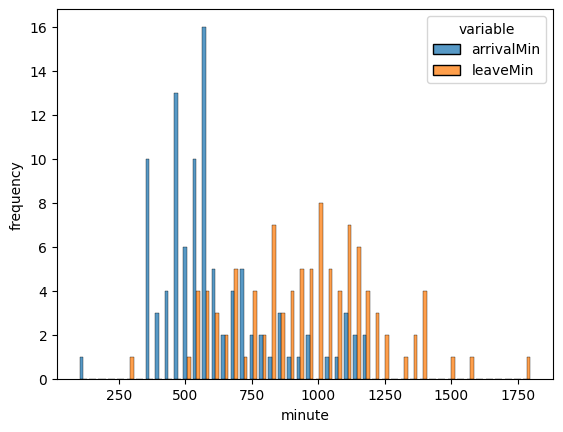

In [14]:
input_df_hist = pd.DataFrame(input_df['arrivalMin'])
input_df_hist['leaveMin']=input_df['arrivalMin'] + input_df['durationMin']

# plot melted dataframe in a single command
p=sns.histplot(input_df_hist.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=48)

p.set_xlabel("minute", fontsize = 10)
p.set_ylabel("frequency", fontsize = 10);

In [15]:
input_df_hist.head()

,arrivalMin,leaveMin
0,98,278
1,475,1075
2,487,757
3,544,1174
4,579,969


In [16]:
input_df['arrivalMinGlobal'][0]

98